**Завдання**
### Напишіть код з використанням EM-алгоритму для визначення ймовірності, на якому заводі був вироблений виріб.
* **До пункту видачі надійшли вироби з такими характеристиками**:
1. Всього виробів - 13 000 одиниць:
* з них виготовлено на першому заводі – 8000 од. вагою 13 кг зі стандартним відхиленням за вагою 0.5 кг;
* на другому – 5000 од. вагою 12 кг зі стандартним відхиленням за вагою 0.7 кг;
* доля якісних вироблених на першому заводі виробів становить 0.85;
* доля якісних вироблених на другому на заводі виробів – 0.8.


In [197]:
# Required libraries.
import numpy as np
from sklearn.mixture import GaussianMixture as GMM
from sklearn.metrics import accuracy_score
from numpy import random
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline


### Data Initialization:

In [198]:
# Кількість заводів.
k = 2

# Кількість виробів із заводу № 1 (кластер 1).
plant_1 = 8000
# Вага виробів заводу № 1.
weight_1 = 13
# Стандартне відхилення за вагою заводу № 1
sigma_1 = 0.5

# Кількість виробів із заводу № 2 (кластер 2).
plant_2 = 5000
# Вага виробів заводу № 2.
weight_2 = 12
# Стандартне відхилення за вагою заводу № 2
sigma_2 = 0.7

# Загальна кількість виробів з двох заводів.
total_prod = plant_1 + plant_2


### Realisation Expectation Maximization (EM) Algorithm:

In [199]:
X = np.zeros((total_prod, 2))

np.random.seed(seed=42)

# Ініціалізація виробів заводу № 1
X[:plant_1, 0] = np.random.normal(loc=weight_1, scale=sigma_1, size=plant_1)
X[:plant_1, 1] = np.random.normal(loc=weight_1, scale=sigma_1, size=plant_1)
# Ініціалізація виробів заводу № 2.
X[plant_1:total_prod, 0] = np.random.normal(loc=weight_2, scale=sigma_2, size=plant_2)
X[plant_1:total_prod, 1] = np.random.normal(loc=weight_2, scale=sigma_2, size=plant_2)


In [200]:
np.random.seed(42)

# Making the Gaussian Mixture model.
GMM_model = GMM(n_components=k, covariance_type='full').fit(X)
# Parameters of the Gaussian Mixture model.
GMM_model.get_params()


{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 2,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [201]:
# Computation.
predict_X = GMM_model.predict(X)

X_answers = []
for i in range(X.shape[0]):
    if predict_X [i] == 0:
        X_answers.append(1)
    else:
        X_answers.append(2)

print('Probability of production by a specific plant:')
print(round(accuracy_score(y, X_answers), 3))


Probability of production by a specific plant:
0.895


### Data Visualization:

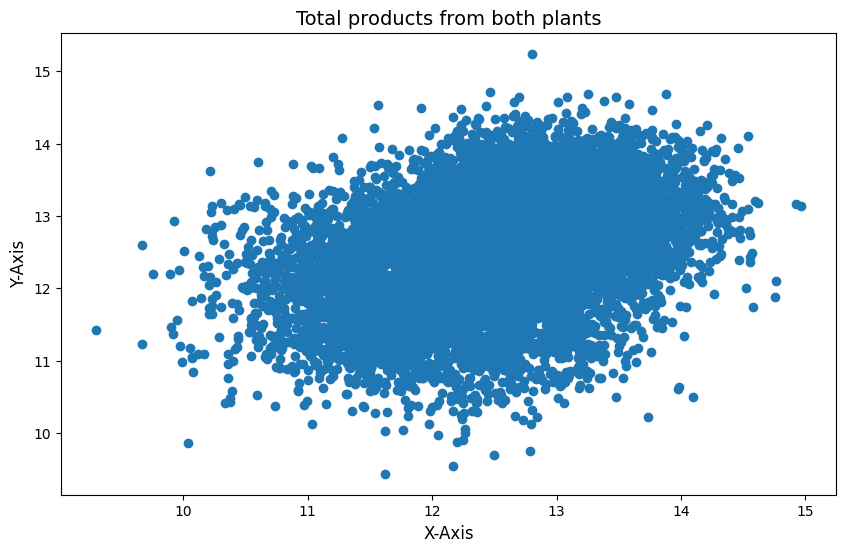

In [202]:
# Visualization all products…
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:,1])
plt.title('Total products from both plants', size=14)
plt.xlabel('X-Axis', fontsize=12)
plt.ylabel('Y-Axis', fontsize=12)
plt.show()


In [203]:
# Initialisation of centres.
GMM_model.centres = GMM_model.means_
print(GMM_model.centres)


[[12.97801312 12.99663314]
 [11.96459262 11.92578428]]


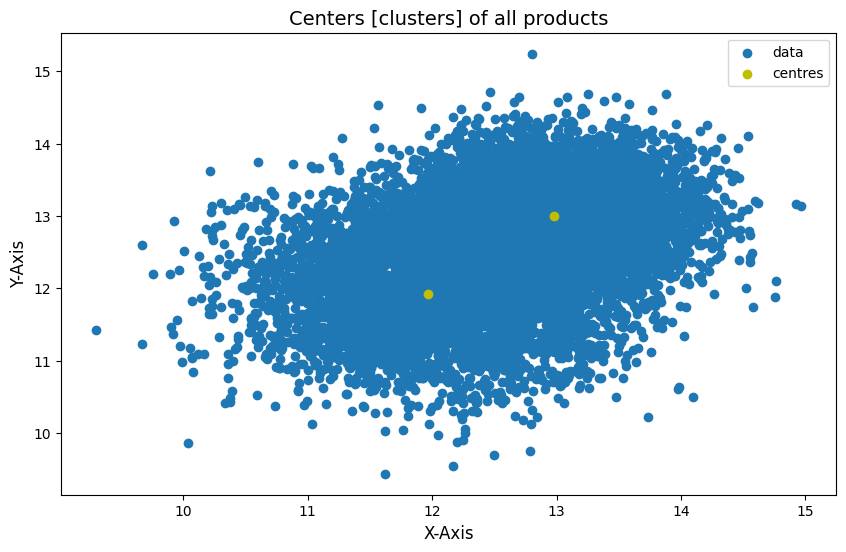

In [204]:
# Visualization all centres…
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:,1], label='data')
plt.scatter(GMM_model.centres[:,0], GMM_model.centres[:,1], c='y', label='centres')
plt.title('Centers [clusters] of all products', size=14)
plt.legend()
plt.xlabel('X-Axis', fontsize=12)
plt.ylabel('Y-Axis', fontsize=12)
plt.show()


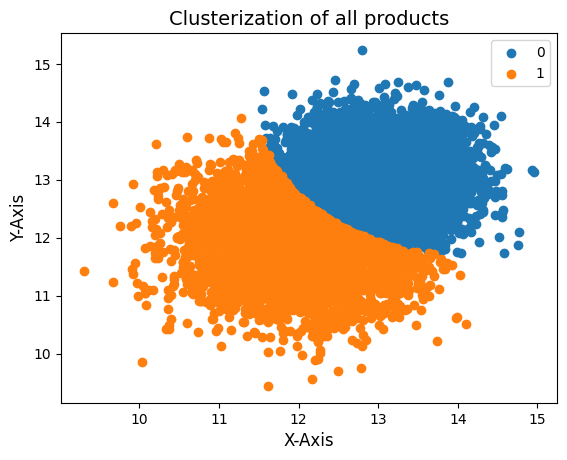

In [205]:
# Making clusterization.
predict_X = GMM_model.predict(X)

df = DataFrame({'X': X[:,0], 'y': X[:,1], 'label': predict_X})
groups = df.groupby('label')

ig, ax = plt.subplots()
for name, group in groups:
    ax.scatter(group.X, group.y, label=name)

ax.legend()
plt.xlabel('X-Axis', fontsize=12)
plt.ylabel('Y-Axis', fontsize=12)
plt.title('Clusterization of all products', size=14)
plt.show()
